In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
import warnings
warnings.simplefilter('ignore')

In [103]:
df_base_titanic = pd.read_csv('train.csv')
df_base_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 1º Explorar o dataset
verificar pessoas da mesma familia pelo sobrenome

In [104]:
print(df_base_titanic.shape[0] , 'X' , df_base_titanic.shape[1])

8693 X 14


O dataset tem 8693 linhas e 14 colunas 

In [105]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [106]:
df_base_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Analisar o quanto da base está com valores faltantes 

In [107]:
df_base_titanic.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [108]:
# melhorando este insight, vamos analisar o quanto de dados faltante representa de cada feature
nan_ratio = []
for col in df_base_titanic.columns :
    nan_item = []
    nan_item.append(col)
    nan_item.append(df_base_titanic[col].isnull().sum())
    nan_item.append(str(round(100*df_base_titanic[col].isnull().sum() / df_base_titanic.shape[0], 2 ))+ '%')
    nan_ratio.append(nan_item)
    
df_nan = pd.DataFrame(nan_ratio, columns=["Column", "NaN count", "NaN ratio"]).set_index("Column")
df_nan = df_nan.sort_values("NaN ratio", ascending=False)
df_nan.astype(object).T

Column,CryoSleep,ShoppingMall,VIP,HomePlanet,Name,Cabin,VRDeck,FoodCourt,Spa,Destination,RoomService,Age,PassengerId,Transported
NaN count,217,208,203,201,200,199,188,183,183,182,181,179,0,0
NaN ratio,2.5%,2.39%,2.34%,2.31%,2.3%,2.29%,2.16%,2.11%,2.11%,2.09%,2.08%,2.06%,0.0%,0.0%


### Analisar se a base é desbalanceada

In [109]:
df_base_titanic['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [110]:
df_base_titanic['Transported'] = np.where(df_base_titanic['Transported'] == True, 1, 0)

### Analisar as features e tratar o dados faltante

In [111]:
df_base_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


#### Features categóricas e Booleanas

#1 HomePlanet

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

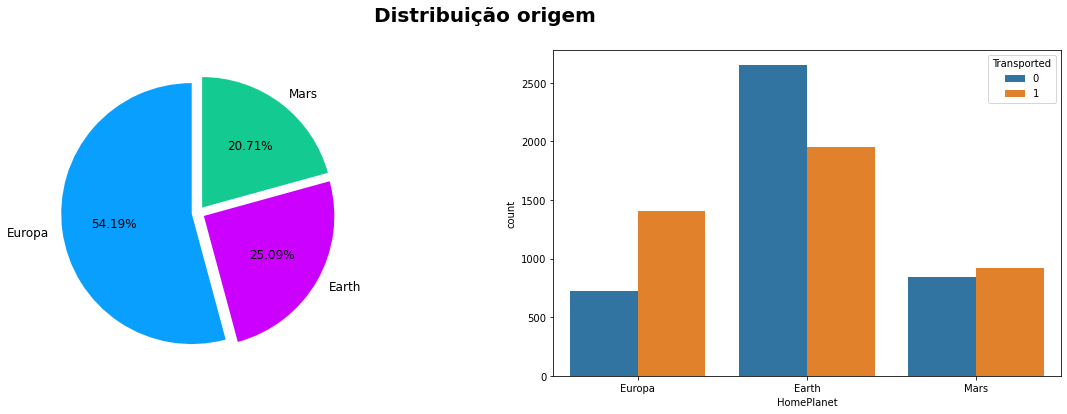

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição origem', size = 20, weight='bold')

sizes = (df_base_titanic['HomePlanet'].value_counts(sort=False))

labels = df_base_titanic['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=df_base_titanic, hue='Transported', ax=ax[1])

In [113]:
most_imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'most_frequent')

In [114]:
df_base_titanic.HomePlanet = most_imputer.fit_transform(df_base_titanic[['HomePlanet']])

#2 CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

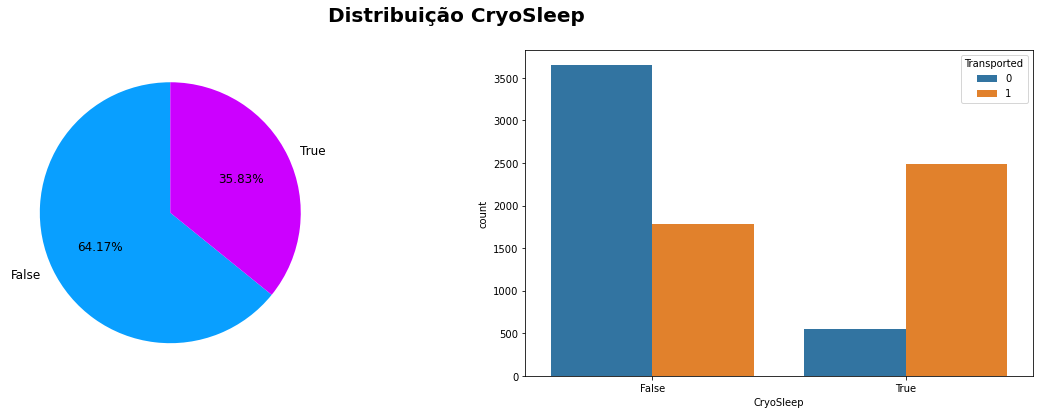

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição CryoSleep', size = 20, weight='bold')

sizes = (df_base_titanic['CryoSleep'].value_counts())

labels = df_base_titanic['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']

ax[0].pie(sizes, colors=colors,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='CryoSleep', data=df_base_titanic, hue='Transported', ax=ax[1])

In [116]:
df_base_titanic.CryoSleep = most_imputer.fit_transform(df_base_titanic[['CryoSleep']])

In [117]:
df_base_titanic['CryoSleep'] = np.where(df_base_titanic['VIP'] == True , 1 , 0)

#3 Cabin

In [118]:
# Removendo todas as linhas onde não temos a informção da cabine, já que não podemos assumir nenhum valor para elas.
df_base_titanic = df_base_titanic.dropna(subset = ['Cabin'])

In [119]:
df_base_titanic['Cabin'] = df_base_titanic['Cabin'].astype(str)

In [120]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8494 non-null   object 
 1   HomePlanet    8494 non-null   object 
 2   CryoSleep     8494 non-null   int32  
 3   Cabin         8494 non-null   object 
 4   Destination   8316 non-null   object 
 5   Age           8319 non-null   float64
 6   VIP           8297 non-null   object 
 7   RoomService   8317 non-null   float64
 8   FoodCourt     8316 non-null   float64
 9   ShoppingMall  8288 non-null   float64
 10  Spa           8313 non-null   float64
 11  VRDeck        8310 non-null   float64
 12  Name          8296 non-null   object 
 13  Transported   8494 non-null   int32  
dtypes: float64(6), int32(2), object(6)
memory usage: 929.0+ KB


In [121]:
df_cabines = df_base_titanic["Cabin"].str.extract("(.*?)/(.*?)/(.)")
df_cabines.columns = ["Deck", "Num", "Side"]

In [122]:
df_cabines["PassengerId"] = df_base_titanic["PassengerId"]
df_cabines.dropna(inplace=True)
df_cabines.head(4)

,Deck,Num,Side,PassengerId
0,B,0,P,0001_01
1,F,0,S,0002_01
2,A,0,S,0003_01
3,A,0,S,0003_02


In [123]:
df_base_titanic = df_base_titanic.merge(df_cabines , how='left')
df_base_titanic.drop(['Cabin'], axis=1 , inplace = True)
df_base_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,1,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,9276_01,Europa,1,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8490,9278_01,Earth,0,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8491,9279_01,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8492,9280_01,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


<AxesSubplot:xlabel='Deck', ylabel='count'>

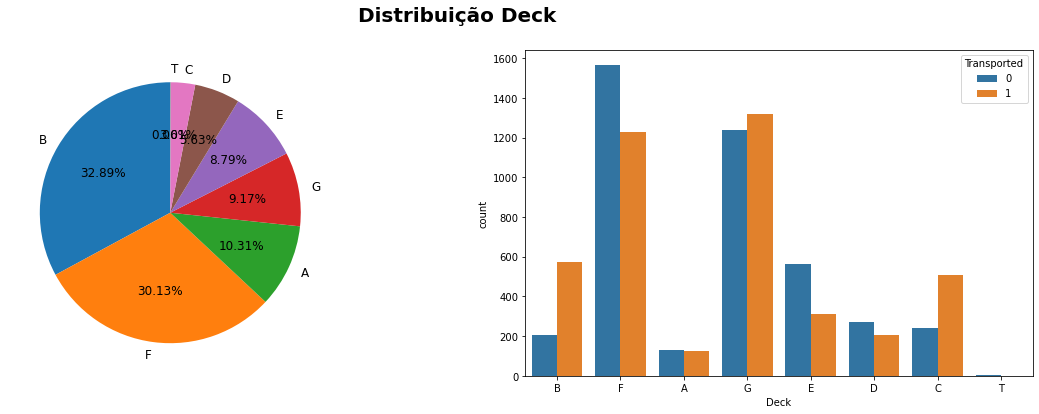

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Deck', size = 20, weight='bold')

sizes = (df_base_titanic['Deck'].value_counts())

labels = df_base_titanic['Deck'].dropna().unique()
 

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Deck', data=df_base_titanic, hue='Transported', ax=ax[1])

<AxesSubplot:xlabel='Side', ylabel='count'>

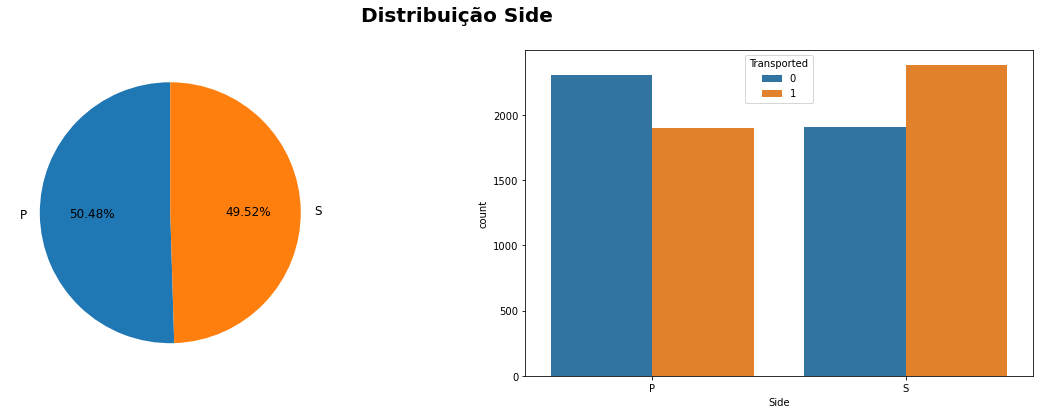

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Side', size = 20, weight='bold')

sizes = df_base_titanic['Side'].value_counts()

labels = df_base_titanic['Side'].dropna().unique()
 

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Side', data=df_base_titanic, hue='Transported', ax=ax[1])

#4 Destination

In [84]:
df_base_titanic.Destination.value_counts()

TRAPPIST-1e      5788
55 Cancri e      1750
PSO J318.5-22     778
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

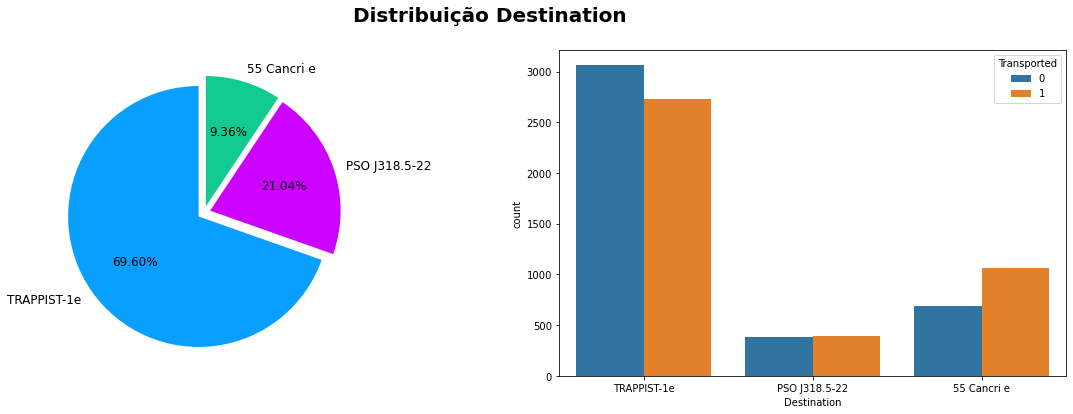

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Destination', size = 20, weight='bold')

sizes = df_base_titanic['Destination'].value_counts()

labels = df_base_titanic['Destination'].dropna().unique()
colors = ['#099FFF', '#CC00FF' , '#13CA91' ]
explode = (0.05,0.05 ,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=df_base_titanic, hue='Transported', ax=ax[1])

In [126]:
df_base_titanic.Destination = most_imputer.fit_transform(df_base_titanic[['Destination']])

#5 VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

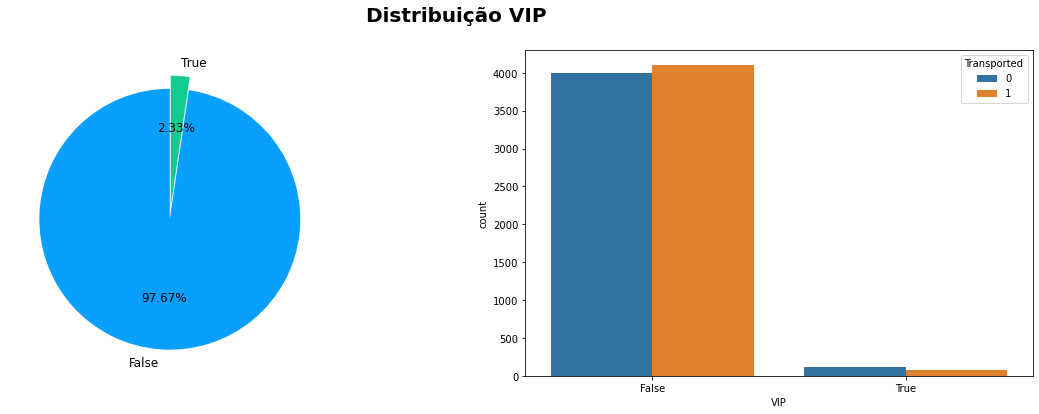

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição VIP', size = 20, weight='bold')

sizes = (df_base_titanic['VIP'].value_counts())

labels = df_base_titanic['VIP'].dropna().unique()
colors = ['#099FFF',  '#13CA91' ]
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=df_base_titanic, hue='Transported', ax=ax[1])

In [128]:
df_base_titanic.VIP = most_imputer.fit_transform(df_base_titanic[['VIP']])

In [129]:
df_base_titanic['VIP'] = np.where(df_base_titanic['VIP'] == True, 1, 0)

#6 PassengerId

In [130]:
df_base_titanic['Group'] = df_base_titanic['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [131]:
df_base_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Group
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,1
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,2
2,0003_01,Europa,1,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,3
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,3
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,9276_01,Europa,1,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P,9276
8490,9278_01,Earth,0,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S,9278
8491,9279_01,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S,9279
8492,9280_01,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S,9280


In [132]:
df_base_titanic.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             175
VIP               0
RoomService     177
FoodCourt       178
ShoppingMall    206
Spa             181
VRDeck          184
Name            198
Transported       0
Deck              0
Num               0
Side              0
Group             0
dtype: int64

#7 Name

In [133]:
df_base_titanic = df_base_titanic.dropna(subset = ['Name'])

In [134]:
df_base_titanic.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             172
VIP               0
RoomService     176
FoodCourt       173
ShoppingMall    202
Spa             175
VRDeck          180
Name              0
Transported       0
Deck              0
Num               0
Side              0
Group             0
dtype: int64

### tratando variaveis númericas com fit_transform

In [135]:
df_base_titanic.Age =  most_imputer.fit_transform(df_base_titanic[['Age']])
df_base_titanic.RoomService =  most_imputer.fit_transform(df_base_titanic[['RoomService']])
df_base_titanic.FoodCourt =  most_imputer.fit_transform(df_base_titanic[['FoodCourt']])
df_base_titanic.ShoppingMall =  most_imputer.fit_transform(df_base_titanic[['ShoppingMall']])
df_base_titanic.Spa =  most_imputer.fit_transform(df_base_titanic[['Spa']])
df_base_titanic.VRDeck =  most_imputer.fit_transform(df_base_titanic[['VRDeck']])

In [136]:
df_base_titanic.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Side            0
Group           0
dtype: int64